<a href="https://colab.research.google.com/github/nyamskamau/Titanic-and-Spambase-datasets-analysis/blob/main/KNearestNeighbors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.Defiining the Question

# 2.Metric for Success

# 3.The Context

#4.The Experimental Design Taken

#5.The Appropriateness of the data to answer the given question.

## Loading the dataset and the appropriate libraries

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns;sns.set_style("whitegrid")
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.preprocessing import StandardScaler,Normalizer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


In [65]:
train = pd.read_csv('train.csv')

In [66]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [67]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [68]:
train.shape

(891, 12)

In [69]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


The column descriptions for the dataset were:
1. Survival - Survival (0 = No; 1 = Yes)
2. Pclass - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
3. Name - Name
4. Sex - Sex
5. Age - Age
6. Sibsp - Number of Siblings/Spouses Aboard
7. Parch - Number of Parents/Children Aboard
8. Ticket - Ticket Number
9. Fare - Passenger Fare
10. Cabin - Cabin
11. Embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

## Data Cleaning

In [70]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [71]:
train.duplicated().sum()

0

In [72]:
train.drop(['Cabin','PassengerId','Name','Ticket'],axis=1,inplace=True)

## Exploratory Data Analysis

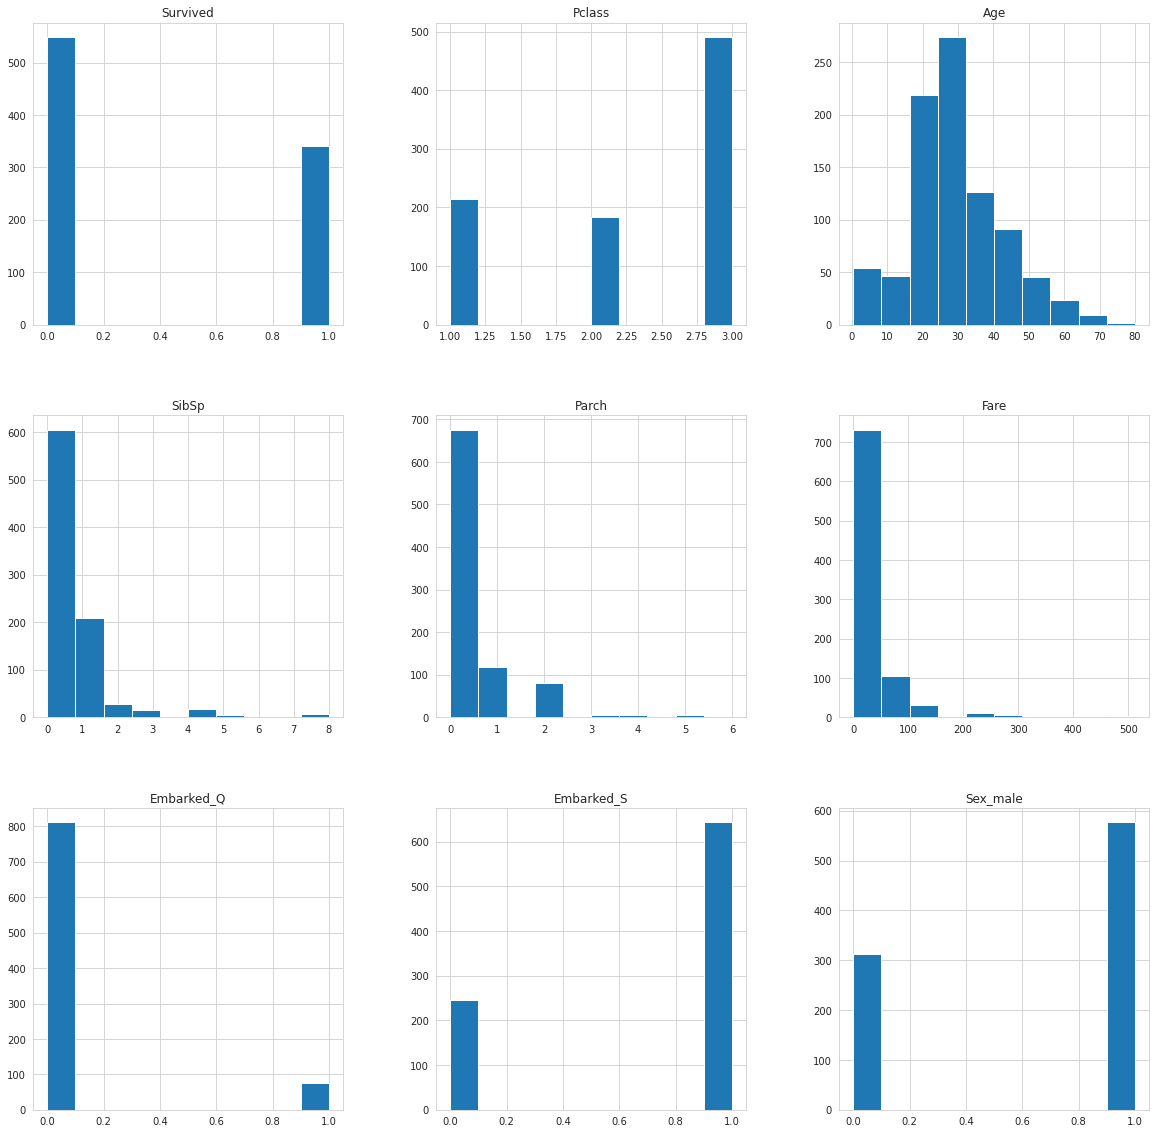

In [193]:
train.hist(figsize=(20,20))

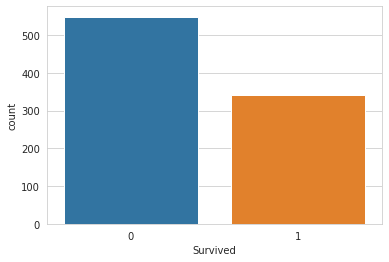

In [74]:
sns.countplot(x = "Survived",data = train)

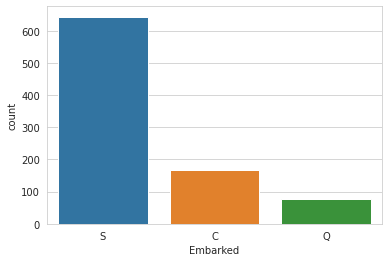

In [75]:
sns.countplot(x = "Embarked",data = train)

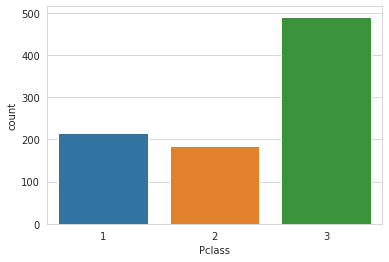

In [76]:
sns.countplot(x = "Pclass",data = train)

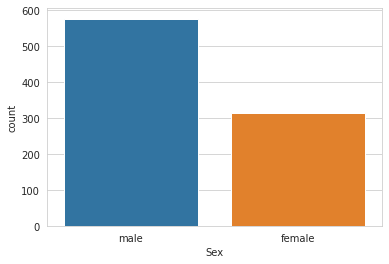

In [77]:
sns.countplot(x = "Sex",data = train)

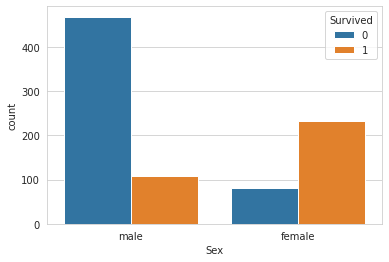

In [78]:
sns.countplot(x=train["Sex"],hue = train["Survived"],data = train)

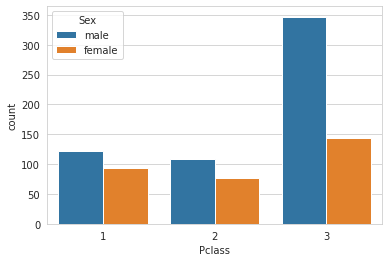

In [79]:
sns.countplot(x=train["Pclass"],hue = train["Sex"],data = train)

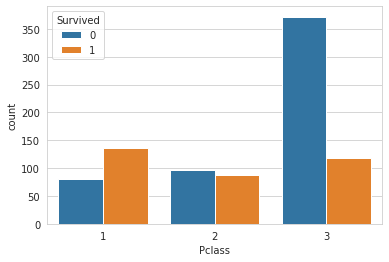

In [80]:
sns.countplot(x=train["Pclass"],hue = train["Survived"],data = train)

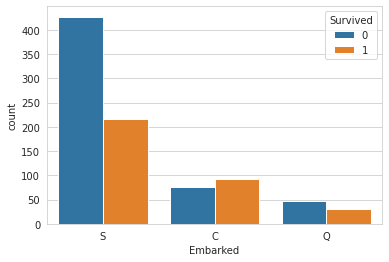

In [81]:
sns.countplot(x=train["Embarked"],hue = train["Survived"],data = train)

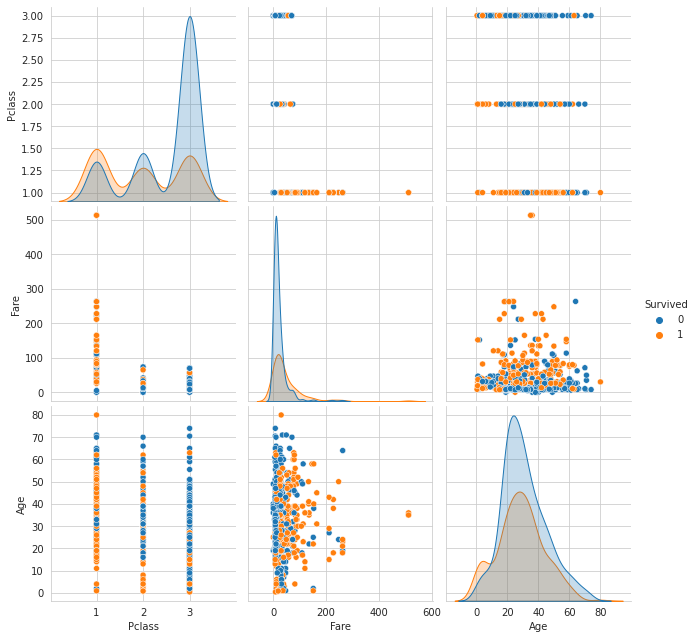

In [82]:
sns.pairplot(train[["Survived","Pclass","Fare","Age"]], hue="Survived", height=3);
plt.show()

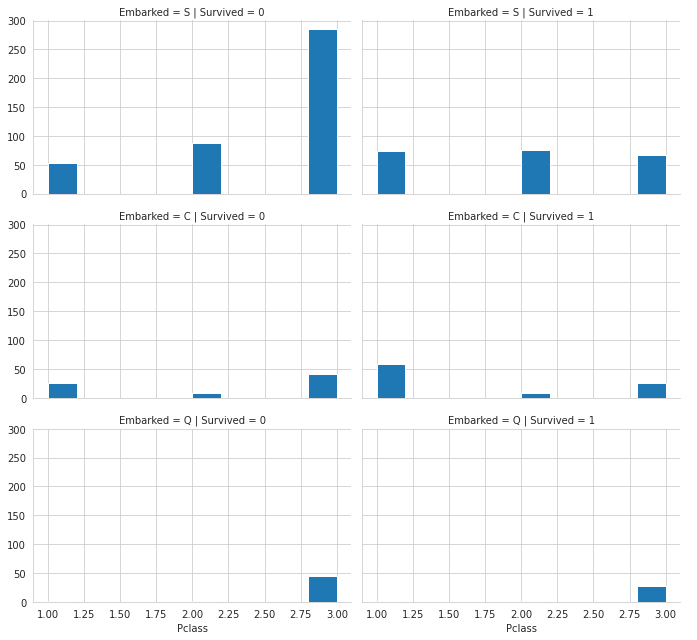

In [83]:
grid = sns.FacetGrid(train, col='Survived', row='Embarked', height=3, aspect=1.6)
grid.map(plt.hist,'Pclass')
grid.add_legend()

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


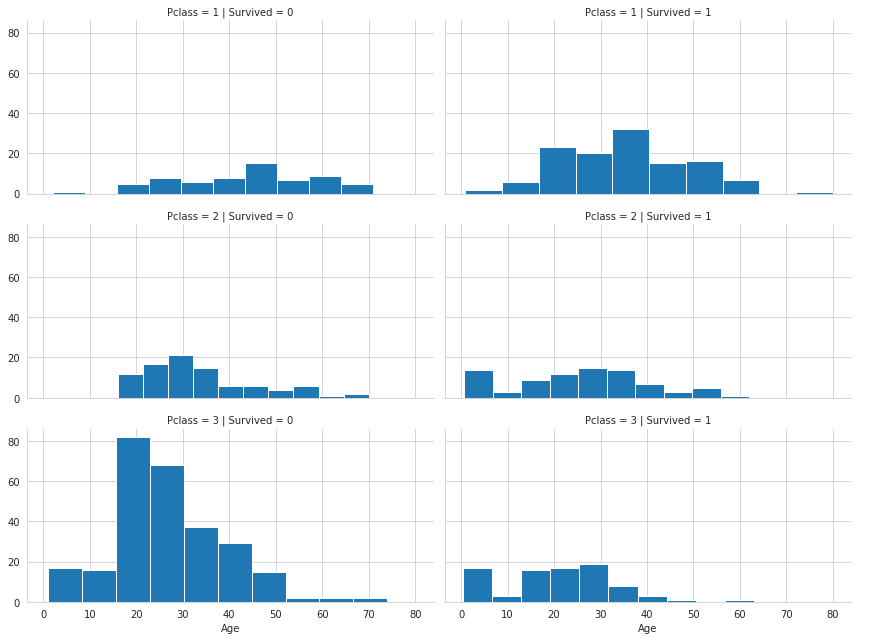

In [84]:
grid = sns.FacetGrid(train, col='Survived', row='Pclass', height=3, aspect=2)
grid.map(plt.hist, 'Age', bins=10)
grid.add_legend()

Feature Engineering

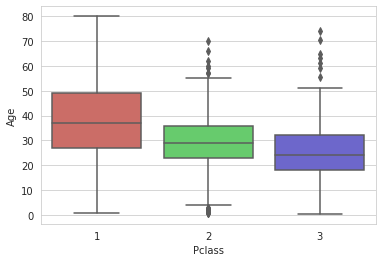

In [85]:
sns.boxplot(x='Pclass', y='Age', data=train, palette='hls')

In [86]:
train.groupby(['Pclass','Sex'])['Age'].mean()

Pclass  Sex   
1       female    34.611765
        male      41.281386
2       female    28.722973
        male      30.740707
3       female    21.750000
        male      26.507589
Name: Age, dtype: float64

In [87]:
def age_approx(cols):
    Age = cols[0]
    Pclass = cols[1]
    Sex = cols[2]
    
    if pd.isnull(Age):
        if Pclass == 1 and Sex== 'female' :
            return 34.611765
        elif Pclass == 1 and Sex == 'male':
            return 41.281386
        elif Pclass == 2 and Sex == 'female':
          return 28.722973
        elif Pclass == 2 and Sex == 'male':
          return 30.740707
        elif Pclass == 3 and Sex == 'female':
          return 21.75
        else:
            return 26.51
    else:
        return Age

        

In [88]:
train['Age'] = train[['Age', 'Pclass','Sex']].apply(age_approx, axis=1)

In [89]:
train.dropna(inplace=True)

In [90]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [91]:
train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [92]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,29.272370,0.524184,0.382452,32.096681
std,0.486260,0.834700,13.247405,1.103705,0.806761,49.697504
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,21.750000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,26.510000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,36.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [93]:
dummies = pd.get_dummies(train[['Embarked','Sex']],drop_first=True)

In [94]:
train = pd.concat([train,dummies],axis=1)

In [95]:
train.drop(['Embarked','Sex'],axis=1,inplace=True)

In [96]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Sex_male
0,0,3,22.0,1,0,7.2500,0,1,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,1,0
3,1,1,35.0,1,0,53.1000,0,1,0
4,0,3,35.0,0,0,8.0500,0,1,1


## Building the KNN model 80:20

In [97]:
X = train.drop('Survived',axis=1)
y = train.Survived
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [98]:
knn = KNeighborsClassifier()
knn = knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
accuracy_score(y_test,y_pred)

0.7415730337078652

In [99]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)


In [100]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors' :[3,5,13,15,17,21,31,41,43,45,51,53,55,57],
          'metric' : ['euclidean','manhattan','minkowski'],
          'weights':['uniform','distance',],
          }

grid = GridSearchCV(estimator= KNeighborsClassifier(),param_grid = params,cv=10)
grid.fit(X_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [3, 5, 13, 15, 17, 21, 31, 41, 43, 45,
                                         51, 53, 55, 57],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [101]:
grid.best_params_

{'metric': 'manhattan', 'n_neighbors': 17, 'weights': 'uniform'}

In [102]:
knn = KNeighborsClassifier(n_neighbors=17,metric='manhattan',weights='uniform')
knn = knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
accuracy_score(y_test,y_pred)

0.8258426966292135

In [103]:
confusion_matrix(y_test,y_pred)

array([[95, 10],
       [21, 52]])

## Building the KNN model 70:30

In [111]:
X = train.drop('Survived',axis=1)
y = train.Survived
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [112]:
knn = KNeighborsClassifier()
knn = knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
accuracy_score(y_test,y_pred)

0.7116104868913857

In [113]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)


In [114]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors' :[3,5,9,11,13,15,17,21,31,41,43,45,51,53,55,57],
        
          }

grid = GridSearchCV(estimator= knn,param_grid = params,cv=10)
grid.fit(X_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [3, 5, 9, 11, 13, 15, 17, 21, 31, 41,
                                         43, 45, 51, 53, 55, 57]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [115]:
grid.best_params_

{'n_neighbors': 11}

In [117]:
knn = KNeighborsClassifier(n_neighbors=11,metric='manhattan',weights='uniform')
knn = knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
accuracy_score(y_test,y_pred)

0.8314606741573034

In [118]:
confusion_matrix(y_test,y_pred)

array([[147,  19],
       [ 26,  75]])

## Building the KNN model 60:40

In [186]:
X = train.drop('Survived',axis=1)
y = train.Survived
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4)

In [187]:
knn = KNeighborsClassifier()
knn = knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
accuracy_score(y_test,y_pred)

0.7106741573033708

In [188]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)


In [189]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors' :[3,5,13,15,17,21,31,41,43,45,51,53,55,57],
          'metric' : ['euclidean','manhattan','minkowski'],
          'weights':['uniform','distance',],
          }

grid = GridSearchCV(estimator= KNeighborsClassifier(),param_grid = params,cv=10)
grid.fit(X_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [3, 5, 13, 15, 17, 21, 31, 41, 43, 45,
                                         51, 53, 55, 57],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [190]:
grid.best_params_

{'metric': 'manhattan', 'n_neighbors': 13, 'weights': 'uniform'}

In [191]:
knn = KNeighborsClassifier(n_neighbors=13,metric='manhattan',weights='uniform')
knn = knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
accuracy_score(y_test,y_pred)

0.8258426966292135

In [192]:
confusion_matrix(y_test,y_pred)

array([[197,  15],
       [ 47,  97]])